In [42]:
from MLimports2 import *
exec(MLimports())

In [43]:
from sklearn.datasets import make_regression

In [44]:
# reg = XGBRegressor()

In [45]:
# reg.fit(X,Y)

In [46]:
def classify(Y,lo,hi):
    nY = copy.deepcopy(Y)
    nY[Y<=lo] = 0
    nY[(Y>lo) & (Y<=hi)] = 1
    nY[(Y>=hi)] = 2
    return nY.astype(np.int)

In [47]:
def f1optmicro(Yt,Yp):
    return f1_score(Yt,Yp, average='micro')

def f1optmacro(Yt,Yp):
    return f1_score(Yt,Yp, average='macro')

In [48]:
#X,Y = make_regression(1000,n_features=20,n_informative=12,noise=100)
#Y = np.exp(2.7+3.85*((Y-Y.min())/((Y-Y.min()).max())))
X,Y = getBFS(part=[5,-1],dataset='a')
X=X.values

quantiles = [np.quantile(Y,A) for A in np.linspace(0.1,0.9,9)]
ktiles = np.round([A for A in np.linspace(0.1,0.9,9)],2)

RANGES=[]
KRANGES=[]
for i in range(len(quantiles)-1):
    for j in range(i+1,len(quantiles)):
        if quantiles[i]!=quantiles[j]:
            KRANGES.append( [ktiles[i],ktiles[j]] )
            RANGES.append( [quantiles[i],quantiles[j]] )

# KRANGES=[]
# for i in range(len(ktiles)-1):
#     for j in range(i+1,len(ktiles)):
#         KRANGES.append( [ktiles[i],ktiles[j]] )

# RANGES=[]
# for i in range(len(quantiles)-1):
#     for j in range(i+1,len(quantiles)):
#         if quantiles[i]!=quantiles[j]:
#             RANGES.append( [quantiles[i],quantiles[j]] )

In [49]:
RANGES

[[10.0, 17.0],
 [10.0, 22.0],
 [10.0, 27.0],
 [10.0, 32.0],
 [10.0, 39.0],
 [10.0, 49.0],
 [10.0, 59.0],
 [10.0, 88.19999999999999],
 [17.0, 22.0],
 [17.0, 27.0],
 [17.0, 32.0],
 [17.0, 39.0],
 [17.0, 49.0],
 [17.0, 59.0],
 [17.0, 88.19999999999999],
 [22.0, 27.0],
 [22.0, 32.0],
 [22.0, 39.0],
 [22.0, 49.0],
 [22.0, 59.0],
 [22.0, 88.19999999999999],
 [27.0, 32.0],
 [27.0, 39.0],
 [27.0, 49.0],
 [27.0, 59.0],
 [27.0, 88.19999999999999],
 [32.0, 39.0],
 [32.0, 49.0],
 [32.0, 59.0],
 [32.0, 88.19999999999999],
 [39.0, 49.0],
 [39.0, 59.0],
 [39.0, 88.19999999999999],
 [49.0, 59.0],
 [49.0, 88.19999999999999],
 [59.0, 88.19999999999999]]

In [51]:
RES=[]
for i in range(0,len(RANGES)):
    lo,hi = RANGES[i]
    nY = classify(Y,lo,hi)
    
    from sklearn.model_selection import StratifiedKFold
    kf = StratifiedKFold(n_splits=10,shuffle=True)
    kf.get_n_splits(X,nY)
    FMAC = []
    for train_index, test_index in kf.split(X,nY):
        Xtr, Xte = X[train_index], X[test_index]
        Ytr, Yte = nY[train_index], nY[test_index]
        reg = XGBClassifier(n_estimators=300,use_label_encoder=False,verbosity = 0)
        #plt.hist(Ytr)
        reg.fit(Xtr,Ytr)
        preds = reg.predict(Xte)
        FMAC.append(f1optmacro(Yte,preds))
    
    print("{},{},{}".format(KRANGES[i][0],KRANGES[i][1],np.round(np.mean(FMAC),2)))
    RES.append([KRANGES[i][0],KRANGES[i][1],np.round(np.mean(FMAC),2)])
    

0.1,0.2,0.39


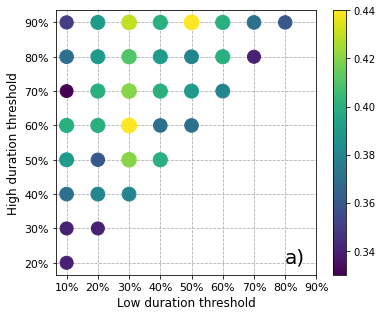

In [41]:
RES = np.array(RES)
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(5.5,4.5))
plt.grid(linestyle='--')
plt.scatter(RES[:,0],RES[:,1],c=RES[:,2],s=RES[:,2]*500)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'],fontsize=11)
plt.yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], ['20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'],fontsize=11)
plt.colorbar()
plt.xlabel("Low duration threshold",fontsize=12)
plt.ylabel("High duration threshold",fontsize=12)
plt.text(0.8, 0.2, 'a)', fontsize = 20)
# plt.ylim(0.35,0.95)
plt.tight_layout()
plt.savefig("A_MC.pdf")

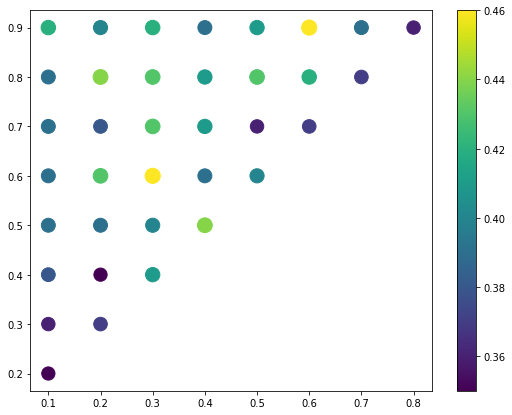

In [333]:
RES = np.array(RES)
plt.scatter(RES[:,0],RES[:,1],c=RES[:,2],s=RES[:,2]*500)
plt.colorbar()

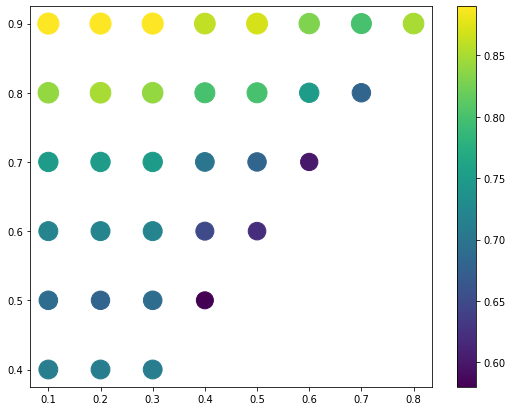

In [329]:
plt.scatter(RES[:,0],RES[:,1],c=RES[:,2],s=RES[:,2]*500)
plt.colorbar()

In [ ]:
OPTIMIZER = []
OPTIMIZER.append({'name':'XGB','instance':XGBClassifier,'param':{
            'learning_rate' : [0.0001, 0.001, 0.01, 0.1], 
            'n_estimators' : range(20,200,1),
            'max_depth':range(1,15,1), ##MAR: start at 3 
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
        }})
METRIC = []
METRIC.append({'name':'f1_score_macro','instance':f1optmacro})
# METRIC.append({'name':'f1_score_micro','instance':f1optmicro})

search = RandomizedSearchCV(estimator = REG['instance'](),
                               param_distributions=REG['param'],
                               n_iter=50,
                               scoring=make_scorer(MET['instance'], greater_is_better=True),
                               n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                               cv = 5,
                               verbose = 1
                                   )
            search.fit(Xtr, Ytr)

            pred = search.predict(Xte)

In [186]:
reg = XGBClassifier(use_label_encoder=False)
cross_val_score(reg,X,classify(Y,lo,hi))

[02:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.8325, 0.8475, 0.835 , 0.8375, 0.8375])

(0.0, 3.0)

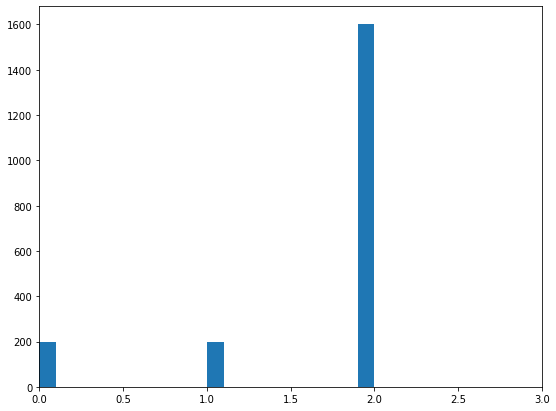

In [176]:
plt.hist(nY,bins=20)
plt.xlim(0,3)

In [141]:
RANGES

[[14.879731724872837, 44.402819840697184],
 [44.402819840697184, 55.90007810904284],
 [55.90007810904284, 68.59793391739267],
 [68.59793391739267, 78.43668321304834],
 [78.43668321304834, 90.72071671546234],
 [90.72071671546234, 103.49319918385679],
 [103.49319918385679, 116.29782767736185],
 [116.29782767736185, 138.61450784250533],
 [138.61450784250533, 177.7691400669564],
 [177.7691400669564, 699.2441738158858]]

In [187]:
X,Y = getBFS(part=[0,-1],dataset='sf')
np.mean(cross_val_score(reg,X,Y,scoring='neg_mean_squared_error',cv=10))

c:\users\user\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
c:\users\user\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\python39\lib\site-packages\xgboost\core.py", line 436, in inner_f
    return f(**kwargs)
  File "c:\users\user\python39\lib\site-packages\xgboost\sklearn.py", line 1123, in fit
    raise ValueError(label_encoding_check_error)
ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].

  w

nan

(array([291., 382., 204.,  63.,  36.,   9.,  10.,   2.,   2.,   1.]),
 array([ 14.87973172,  83.31617593, 151.75262014, 220.18906435,
        288.62550856, 357.06195277, 425.49839698, 493.93484119,
        562.3712854 , 630.80772961, 699.24417382]),
 <BarContainer object of 10 artists>)

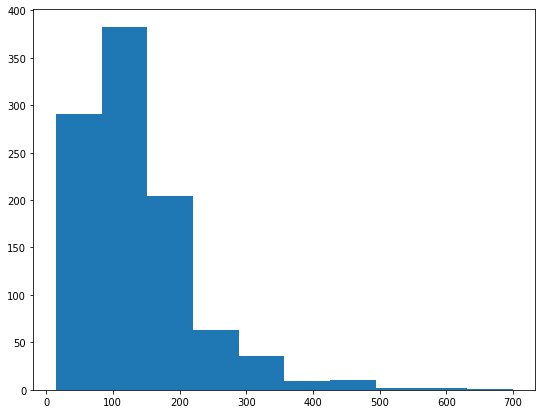

In [60]:
plt.hist( VALS)

In [55]:
np.log(15)

2.70805020110221

In [3]:
OPTIMIZER = []
OPTIMIZER.append({'name':'XGB','instance':XGBClassifier,'param':{
            'learning_rate' : [0.0001, 0.001, 0.01, 0.1], 
            'n_estimators' : range(20,200,1),
            'max_depth':range(1,15,1), ##MAR: start at 3 
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
        }})

def f1optmicro(Yt,Yp):
    return f1_score(Yt,Yp, average='micro')

def f1optmacro(Yt,Yp):
    return f1_score(Yt,Yp, average='macro')

In [ ]:
RESULTS=[]

In [4]:
def EVAL(REG,MET,X,Y):
    global RESULTS
    from sklearn.model_selection import StratifiedKFold
    import multiprocessing
    
    FOLDS=10
    ATTEMPTS=1
    kf = StratifiedKFold(n_splits=FOLDS)
    kf.get_n_splits(X,Y,shuffle=True)

    SCOREF1Macro=[]
    SCOREF1Micro=[]

    for A in range(ATTEMPTS):
        for train_index, test_index in kf.split(X,Y):
            Xtr, Xte = X.iloc[train_index], X.iloc[test_index]
            Ytr, Yte = Y[train_index], Y[test_index]
            evaluation = [( Xtr,Ytr ), ( Xte, Yte)]

            search = RandomizedSearchCV(estimator = REG['instance'](),
                               param_distributions=REG['param'],
                               n_iter=50,
                               scoring=make_scorer(MET['instance'], greater_is_better=True),
                               n_jobs=multiprocessing.cpu_count(), ## MAR: used to be 1
                               cv = 5,
                               verbose = 1
                                   )
            search.fit(Xtr, Ytr)

            pred = search.predict(Xte)

    #             if log:
    #                 pred=np.expm1(pred)
#             print(Yte, pred)
            SCOREF1Macro.append(f1_score(Yte, pred,average='macro'))
            SCOREF1Micro.append(f1_score(Yte, pred,average='micro'))

    RESULTS.append({'Optimizer': REG['name'],
      'Training': MET['name'],
      'f1_micro': np.array(SCOREF1Micro).mean(),
      'f1_macro': np.array(SCOREF1Macro).mean()})

In [5]:
X,Y = getBFS(part=[5,-1])

AttributeError: 'NoneType' object has no attribute 'columns'

In [2]:
METRIC = []
METRIC.append({'name':'f1_score_macro','instance':f1optmacro})
METRIC.append({'name':'f1_score_micro','instance':f1optmicro})

for A in np.arange(5,120,5):
    for B in np.arange(A+5,120,5):
#         print(i,j)
        print(A,B)
    
        X,Y = getBFS(part=[5,-1])
        newY = copy.deepcopy(Y)
        newY[(Y>=0) & (Y<A)]=0
        newY[(Y>=A) & (Y<B)]=1
        newY[(Y>=B) & (Y<=max(Y))]=2
        
        for O in OPTIMIZER:
            for M in METRIC:        
                EVAL(O,M,X,newY)
                RESULTS[-1]['lower_bound']=A
                RESULTS[-1]['upper_bound']=B

In [5]:
RESULTS

[{'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.9111393323657474,
  'f1_macro': 0.4909766186702704,
  'lower_bound': 5,
  'upper_bound': 10},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.9187227866473149,
  'f1_macro': 0.47880955154338967,
  'lower_bound': 5,
  'upper_bound': 10},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7977866473149492,
  'f1_macro': 0.4922161401333273,
  'lower_bound': 5,
  'upper_bound': 15},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8336719883889696,
  'f1_macro': 0.4545671229667564,
  'lower_bound': 5,
  'upper_bound': 15},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7239840348330914,
  'f1_macro': 0.5277178704938669,
  'lower_bound': 5,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7542815674891147,
  'f1_macro': 0.4504504775262138,
  'lower_bound': 5,
  'upper_bound': 20},
 {'Optimizer': 

In [3]:
RES = [{'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.9111393323657474,
  'f1_macro': 0.4909766186702704,
  'lower_bound': 5,
  'upper_bound': 10},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.9187227866473149,
  'f1_macro': 0.47880955154338967,
  'lower_bound': 5,
  'upper_bound': 10},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7977866473149492,
  'f1_macro': 0.4922161401333273,
  'lower_bound': 5,
  'upper_bound': 15},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8336719883889696,
  'f1_macro': 0.4545671229667564,
  'lower_bound': 5,
  'upper_bound': 15},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7239840348330914,
  'f1_macro': 0.5277178704938669,
  'lower_bound': 5,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7542815674891147,
  'f1_macro': 0.4504504775262138,
  'lower_bound': 5,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5823294629898402,
  'f1_macro': 0.46550953031229697,
  'lower_bound': 5,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6389695210449927,
  'f1_macro': 0.4325993320839136,
  'lower_bound': 5,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.46708998548621183,
  'f1_macro': 0.43165971792176067,
  'lower_bound': 5,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.48791727140783736,
  'f1_macro': 0.43750279858403596,
  'lower_bound': 5,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4820029027576197,
  'f1_macro': 0.4537122332348639,
  'lower_bound': 5,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5197750362844703,
  'f1_macro': 0.4648789447140917,
  'lower_bound': 5,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5824746008708273,
  'f1_macro': 0.5181166652074014,
  'lower_bound': 5,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.57855587808418,
  'f1_macro': 0.4429225349339352,
  'lower_bound': 5,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.600943396226415,
  'f1_macro': 0.48958144001199144,
  'lower_bound': 5,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6313860667634252,
  'f1_macro': 0.4515301830220098,
  'lower_bound': 5,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6199564586357039,
  'f1_macro': 0.46388643866725293,
  'lower_bound': 5,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6579462989840348,
  'f1_macro': 0.43349402384631297,
  'lower_bound': 5,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.648367198838897,
  'f1_macro': 0.4487532719783139,
  'lower_bound': 5,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6995645863570391,
  'f1_macro': 0.40538929280163505,
  'lower_bound': 5,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7013062409288825,
  'f1_macro': 0.4284438218874865,
  'lower_bound': 5,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7354862119013063,
  'f1_macro': 0.4249271165489377,
  'lower_bound': 5,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7487300435413643,
  'f1_macro': 0.4705943653677133,
  'lower_bound': 5,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7676342525399129,
  'f1_macro': 0.42652295698338144,
  'lower_bound': 5,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.777068214804064,
  'f1_macro': 0.4524470752886093,
  'lower_bound': 5,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7846516690856313,
  'f1_macro': 0.4321418420868076,
  'lower_bound': 5,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8016328011611031,
  'f1_macro': 0.4881815712687351,
  'lower_bound': 5,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7921988388969522,
  'f1_macro': 0.4327057191252763,
  'lower_bound': 5,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7977866473149492,
  'f1_macro': 0.4388047047504987,
  'lower_bound': 5,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8073294629898404,
  'f1_macro': 0.4325729135002743,
  'lower_bound': 5,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7997097242380261,
  'f1_macro': 0.4309857021064814,
  'lower_bound': 5,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8167997097242379,
  'f1_macro': 0.43586175105158204,
  'lower_bound': 5,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8186502177068216,
  'f1_macro': 0.4513145406729272,
  'lower_bound': 5,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8243468795355587,
  'f1_macro': 0.4362934569319001,
  'lower_bound': 5,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8451378809869375,
  'f1_macro': 0.45433986074129235,
  'lower_bound': 5,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8375544267053702,
  'f1_macro': 0.44745392186277455,
  'lower_bound': 5,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8960812772133527,
  'f1_macro': 0.4718814469682263,
  'lower_bound': 5,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8734397677793904,
  'f1_macro': 0.47026675453923106,
  'lower_bound': 5,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8772496371552976,
  'f1_macro': 0.4689773906016246,
  'lower_bound': 5,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8772496371552976,
  'f1_macro': 0.4689773906016246,
  'lower_bound': 5,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8791364296081277,
  'f1_macro': 0.4694818642357383,
  'lower_bound': 5,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8791364296081277,
  'f1_macro': 0.4694818642357383,
  'lower_bound': 5,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8847968069666183,
  'f1_macro': 0.4709952851380798,
  'lower_bound': 5,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8847968069666183,
  'f1_macro': 0.4709952851380798,
  'lower_bound': 5,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8072206095791001,
  'f1_macro': 0.30563856860473015,
  'lower_bound': 10,
  'upper_bound': 15},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8393323657474602,
  'f1_macro': 0.3042072842882857,
  'lower_bound': 10,
  'upper_bound': 15},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7221335268505079,
  'f1_macro': 0.33106750598258305,
  'lower_bound': 10,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7542815674891146,
  'f1_macro': 0.29259525732176506,
  'lower_bound': 10,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5917271407837446,
  'f1_macro': 0.30650099806857506,
  'lower_bound': 10,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6427431059506531,
  'f1_macro': 0.2677656089074027,
  'lower_bound': 10,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4822931785195935,
  'f1_macro': 0.30621576940211626,
  'lower_bound': 10,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4916182873730043,
  'f1_macro': 0.2916871651041618,
  'lower_bound': 10,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.45758345428156744,
  'f1_macro': 0.3144693545748034,
  'lower_bound': 10,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4744920174165458,
  'f1_macro': 0.3241117787501621,
  'lower_bound': 10,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.48203918722786654,
  'f1_macro': 0.309128459716121,
  'lower_bound': 10,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4935050798258345,
  'f1_macro': 0.2857604799026437,
  'lower_bound': 10,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5161828737300435,
  'f1_macro': 0.29414397423203836,
  'lower_bound': 10,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.561465892597968,
  'f1_macro': 0.28379790256219084,
  'lower_bound': 10,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5538461538461539,
  'f1_macro': 0.3247843508129143,
  'lower_bound': 10,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6257256894049347,
  'f1_macro': 0.2818827779104235,
  'lower_bound': 10,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6068577648766327,
  'f1_macro': 0.31661810752638747,
  'lower_bound': 10,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6597605224963716,
  'f1_macro': 0.30316940134355863,
  'lower_bound': 10,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6711901306240928,
  'f1_macro': 0.3343754757304298,
  'lower_bound': 10,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6900580551523947,
  'f1_macro': 0.2791353957708112,
  'lower_bound': 10,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.70899854862119,
  'f1_macro': 0.3031196580718118,
  'lower_bound': 10,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7240928882438316,
  'f1_macro': 0.28808379058914235,
  'lower_bound': 10,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7164368650217707,
  'f1_macro': 0.3159646217742241,
  'lower_bound': 10,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6975689404934688,
  'f1_macro': 0.2814609235779485,
  'lower_bound': 10,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6975689404934688,
  'f1_macro': 0.2875033636256602,
  'lower_bound': 10,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6994920174165458,
  'f1_macro': 0.2816761051348909,
  'lower_bound': 10,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7372278664731495,
  'f1_macro': 0.30701148159706826,
  'lower_bound': 10,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.746589259796807,
  'f1_macro': 0.30892847385426864,
  'lower_bound': 10,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.744811320754717,
  'f1_macro': 0.28869139136273336,
  'lower_bound': 10,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7619375907111756,
  'f1_macro': 0.30261960896366324,
  'lower_bound': 10,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.759978229317852,
  'f1_macro': 0.30009503610316607,
  'lower_bound': 10,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7845791001451379,
  'f1_macro': 0.2977930588704412,
  'lower_bound': 10,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7486937590711176,
  'f1_macro': 0.28190565263662437,
  'lower_bound': 10,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7714078374455733,
  'f1_macro': 0.2933860344381628,
  'lower_bound': 10,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8204281567489116,
  'f1_macro': 0.3004799060567024,
  'lower_bound': 10,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7959361393323657,
  'f1_macro': 0.29802264005620327,
  'lower_bound': 10,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7959361393323657,
  'f1_macro': 0.2990781737726741,
  'lower_bound': 10,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.801632801161103,
  'f1_macro': 0.2976414560508817,
  'lower_bound': 10,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8185776487663281,
  'f1_macro': 0.3001720790443672,
  'lower_bound': 10,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7997460087082728,
  'f1_macro': 0.29726976098110114,
  'lower_bound': 10,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8034833091436866,
  'f1_macro': 0.29814473110280565,
  'lower_bound': 10,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8054063860667634,
  'f1_macro': 0.2983623192165165,
  'lower_bound': 10,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.675,
  'f1_macro': 0.3146629565797861,
  'lower_bound': 15,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7542815674891146,
  'f1_macro': 0.286619195147738,
  'lower_bound': 15,
  'upper_bound': 20},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5634978229317852,
  'f1_macro': 0.29949491635027303,
  'lower_bound': 15,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6503265602322206,
  'f1_macro': 0.2673541060063485,
  'lower_bound': 15,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.42365747460087083,
  'f1_macro': 0.2897373633326971,
  'lower_bound': 15,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5142597968069667,
  'f1_macro': 0.2349519391147316,
  'lower_bound': 15,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4064949201741655,
  'f1_macro': 0.31491069817426354,
  'lower_bound': 15,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4386429608127721,
  'f1_macro': 0.2798863355291677,
  'lower_bound': 15,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4311320754716982,
  'f1_macro': 0.3192354746717278,
  'lower_bound': 15,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.45950653120464446,
  'f1_macro': 0.30572065261025033,
  'lower_bound': 15,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.41955732946298985,
  'f1_macro': 0.32842892671075247,
  'lower_bound': 15,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.48969521044992737,
  'f1_macro': 0.2689293816664852,
  'lower_bound': 15,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4555878084179971,
  'f1_macro': 0.33076686529854826,
  'lower_bound': 15,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5161465892597967,
  'f1_macro': 0.2550979564438035,
  'lower_bound': 15,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5105224963715529,
  'f1_macro': 0.3155757042238683,
  'lower_bound': 15,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5936139332365746,
  'f1_macro': 0.26260762718687675,
  'lower_bound': 15,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5236937590711175,
  'f1_macro': 0.3081405505761896,
  'lower_bound': 15,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.620101596516691,
  'f1_macro': 0.26658458093234894,
  'lower_bound': 15,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6011973875181422,
  'f1_macro': 0.33403109443535517,
  'lower_bound': 15,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6484760522496371,
  'f1_macro': 0.2720756948551153,
  'lower_bound': 15,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5916908563134977,
  'f1_macro': 0.30929014835160223,
  'lower_bound': 15,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6239840348330914,
  'f1_macro': 0.2771218556095783,
  'lower_bound': 15,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6332365747460088,
  'f1_macro': 0.3422740771458169,
  'lower_bound': 15,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6521407837445572,
  'f1_macro': 0.30415059877022066,
  'lower_bound': 15,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6257619738751814,
  'f1_macro': 0.3210342019872788,
  'lower_bound': 15,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6636429608127721,
  'f1_macro': 0.28144282542012383,
  'lower_bound': 15,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6201378809869376,
  'f1_macro': 0.3132901688141418,
  'lower_bound': 15,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6729680696661828,
  'f1_macro': 0.3152349007998132,
  'lower_bound': 15,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6466981132075471,
  'f1_macro': 0.3176934597838373,
  'lower_bound': 15,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7033018867924528,
  'f1_macro': 0.27867866838672184,
  'lower_bound': 15,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6428519593613933,
  'f1_macro': 0.30696227022658507,
  'lower_bound': 15,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.70899854862119,
  'f1_macro': 0.2795687386468008,
  'lower_bound': 15,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6693033381712626,
  'f1_macro': 0.31628524410169984,
  'lower_bound': 15,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.718432510885341,
  'f1_macro': 0.28129553482318076,
  'lower_bound': 15,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7088534107402031,
  'f1_macro': 0.3178841481665379,
  'lower_bound': 15,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.720355587808418,
  'f1_macro': 0.27871361127884187,
  'lower_bound': 15,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.676923076923077,
  'f1_macro': 0.3155257628688098,
  'lower_bound': 15,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7222423802612482,
  'f1_macro': 0.280652107151764,
  'lower_bound': 15,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7089259796806966,
  'f1_macro': 0.3091361175934008,
  'lower_bound': 15,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7279027576197389,
  'f1_macro': 0.28186464432861136,
  'lower_bound': 15,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5881349782293178,
  'f1_macro': 0.3283661000976789,
  'lower_bound': 20,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6503265602322207,
  'f1_macro': 0.2780519093342931,
  'lower_bound': 20,
  'upper_bound': 25},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.47467343976777937,
  'f1_macro': 0.3563038881108767,
  'lower_bound': 20,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5406748911465893,
  'f1_macro': 0.2536382806979013,
  'lower_bound': 20,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.44245283018867926,
  'f1_macro': 0.3716414046505482,
  'lower_bound': 20,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.43301886792452826,
  'f1_macro': 0.28836798984372297,
  'lower_bound': 20,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4084179970972424,
  'f1_macro': 0.3829956025875921,
  'lower_bound': 20,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4197387518142235,
  'f1_macro': 0.37179076445814896,
  'lower_bound': 20,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3970972423802613,
  'f1_macro': 0.33456497315424477,
  'lower_bound': 20,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.40264876632801166,
  'f1_macro': 0.27102771601982384,
  'lower_bound': 20,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.41219158200290273,
  'f1_macro': 0.32864762970032346,
  'lower_bound': 20,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.42728592162554424,
  'f1_macro': 0.2577440827640836,
  'lower_bound': 20,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.44629898403483315,
  'f1_macro': 0.33310909980896863,
  'lower_bound': 20,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4821480406386066,
  'f1_macro': 0.23543545081280487,
  'lower_bound': 20,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4802249637155297,
  'f1_macro': 0.3310297779810875,
  'lower_bound': 20,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5369375907111756,
  'f1_macro': 0.27727728025920706,
  'lower_bound': 20,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5143323657474601,
  'f1_macro': 0.33949537059937274,
  'lower_bound': 20,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5502177068214804,
  'f1_macro': 0.268447592158074,
  'lower_bound': 20,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5501088534107401,
  'f1_macro': 0.34632144846779694,
  'lower_bound': 20,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5540275761973875,
  'f1_macro': 0.2892761428418399,
  'lower_bound': 20,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5444847605224963,
  'f1_macro': 0.34808990916047416,
  'lower_bound': 20,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5652031930333817,
  'f1_macro': 0.282988913266627,
  'lower_bound': 20,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5500725689404934,
  'f1_macro': 0.32801893673633764,
  'lower_bound': 20,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5842525399129174,
  'f1_macro': 0.2787636833450787,
  'lower_bound': 20,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5690856313497823,
  'f1_macro': 0.34121840925033065,
  'lower_bound': 20,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.599310595065312,
  'f1_macro': 0.2617725844187268,
  'lower_bound': 20,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5843251088534108,
  'f1_macro': 0.3302199628342353,
  'lower_bound': 20,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6125907111756168,
  'f1_macro': 0.2732704274070784,
  'lower_bound': 20,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5861756168359942,
  'f1_macro': 0.3255043806199797,
  'lower_bound': 20,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6126269956458635,
  'f1_macro': 0.2694407821435384,
  'lower_bound': 20,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6427068214804063,
  'f1_macro': 0.3428614559319862,
  'lower_bound': 20,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6503628447024673,
  'f1_macro': 0.3219343395573778,
  'lower_bound': 20,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6050072568940493,
  'f1_macro': 0.34034972686769377,
  'lower_bound': 20,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6617198838896952,
  'f1_macro': 0.31669412190286084,
  'lower_bound': 20,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.648367198838897,
  'f1_macro': 0.3503614056280733,
  'lower_bound': 20,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.659833091436865,
  'f1_macro': 0.3133503668946226,
  'lower_bound': 20,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.629499274310595,
  'f1_macro': 0.3431900780511175,
  'lower_bound': 20,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6617198838896952,
  'f1_macro': 0.29600438179867805,
  'lower_bound': 20,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.45950653120464435,
  'f1_macro': 0.32133235637966295,
  'lower_bound': 25,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5218069666182874,
  'f1_macro': 0.2872442250148476,
  'lower_bound': 25,
  'upper_bound': 30},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.41792452830188687,
  'f1_macro': 0.335149738363138,
  'lower_bound': 25,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.41977503628447027,
  'f1_macro': 0.2710749578266102,
  'lower_bound': 25,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3592525399129173,
  'f1_macro': 0.31517233686470125,
  'lower_bound': 25,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.37594339622641515,
  'f1_macro': 0.2925174986473062,
  'lower_bound': 25,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3270319303338171,
  'f1_macro': 0.2939497732449289,
  'lower_bound': 25,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.3742017416545719,
  'f1_macro': 0.34169385283782056,
  'lower_bound': 25,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.361066763425254,
  'f1_macro': 0.32147476460032565,
  'lower_bound': 25,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.36298984034833087,
  'f1_macro': 0.3219094058769577,
  'lower_bound': 25,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3743831640058055,
  'f1_macro': 0.3237321417504327,
  'lower_bound': 25,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.35928882438316395,
  'f1_macro': 0.262446379914161,
  'lower_bound': 25,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4084179970972424,
  'f1_macro': 0.3115785971058598,
  'lower_bound': 25,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.38766328011611034,
  'f1_macro': 0.24825775020647284,
  'lower_bound': 25,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4349419448476053,
  'f1_macro': 0.3359466745333883,
  'lower_bound': 25,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.41792452830188687,
  'f1_macro': 0.2498189212176803,
  'lower_bound': 25,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.42550798258345435,
  'f1_macro': 0.3185624581476669,
  'lower_bound': 25,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.44626269956458636,
  'f1_macro': 0.2642595463831221,
  'lower_bound': 25,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4404934687953556,
  'f1_macro': 0.3228275346496165,
  'lower_bound': 25,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4631349782293179,
  'f1_macro': 0.24899833640031738,
  'lower_bound': 25,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4481494920174166,
  'f1_macro': 0.30141033234553005,
  'lower_bound': 25,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.478410740203193,
  'f1_macro': 0.28491593929735703,
  'lower_bound': 25,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.42365747460087083,
  'f1_macro': 0.29591289593655096,
  'lower_bound': 25,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4897677793904208,
  'f1_macro': 0.25291623499068505,
  'lower_bound': 25,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4860304789550073,
  'f1_macro': 0.33109424762096623,
  'lower_bound': 25,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5218795355587809,
  'f1_macro': 0.26762249150893286,
  'lower_bound': 25,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4898403483309144,
  'f1_macro': 0.30948661239767594,
  'lower_bound': 25,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5142960812772133,
  'f1_macro': 0.2635773623541594,
  'lower_bound': 25,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5256531204644411,
  'f1_macro': 0.31941721875960927,
  'lower_bound': 25,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5388243831640057,
  'f1_macro': 0.29170035080778944,
  'lower_bound': 25,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5558417997097241,
  'f1_macro': 0.3495525386616035,
  'lower_bound': 25,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5445210449927431,
  'f1_macro': 0.2786323064630429,
  'lower_bound': 25,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.527576197387518,
  'f1_macro': 0.31530031647699464,
  'lower_bound': 25,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5350870827285922,
  'f1_macro': 0.27935788032933284,
  'lower_bound': 25,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5332002902757619,
  'f1_macro': 0.315225135611828,
  'lower_bound': 25,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5520682148040639,
  'f1_macro': 0.27064381100633506,
  'lower_bound': 25,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.45384615384615384,
  'f1_macro': 0.30823448725254204,
  'lower_bound': 30,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4386429608127721,
  'f1_macro': 0.265010501646079,
  'lower_bound': 30,
  'upper_bound': 35},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3570754716981132,
  'f1_macro': 0.2848954542331681,
  'lower_bound': 30,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.42122641509433956,
  'f1_macro': 0.28740613926059766,
  'lower_bound': 30,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.39484760522496376,
  'f1_macro': 0.3308302898601263,
  'lower_bound': 30,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.43447024673439766,
  'f1_macro': 0.26310978018106634,
  'lower_bound': 30,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.38167634252539917,
  'f1_macro': 0.3106597706282641,
  'lower_bound': 30,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4269230769230769,
  'f1_macro': 0.22856233578924812,
  'lower_bound': 30,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.359288824383164,
  'f1_macro': 0.2910560273586099,
  'lower_bound': 30,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4271770682148041,
  'f1_macro': 0.2307193904698286,
  'lower_bound': 30,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.36872278664731495,
  'f1_macro': 0.2760071136631848,
  'lower_bound': 30,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4235486211901306,
  'f1_macro': 0.28598654329233986,
  'lower_bound': 30,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3858490566037736,
  'f1_macro': 0.2829523516608879,
  'lower_bound': 30,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.40468069666182876,
  'f1_macro': 0.2610218062584575,
  'lower_bound': 30,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.42358490566037743,
  'f1_macro': 0.3382918779393436,
  'lower_bound': 30,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.419811320754717,
  'f1_macro': 0.3079213305586068,
  'lower_bound': 30,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3858490566037736,
  'f1_macro': 0.2890294926159506,
  'lower_bound': 30,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.39147314949201745,
  'f1_macro': 0.2647431316432878,
  'lower_bound': 30,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.38399854862119015,
  'f1_macro': 0.2754294513279079,
  'lower_bound': 30,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.423766328011611,
  'f1_macro': 0.30619851356673816,
  'lower_bound': 30,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.38396226415094337,
  'f1_macro': 0.2879022647441647,
  'lower_bound': 30,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.41041364296081284,
  'f1_macro': 0.29294326851845376,
  'lower_bound': 30,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.43882438316400585,
  'f1_macro': 0.29840617172505557,
  'lower_bound': 30,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4218069666182874,
  'f1_macro': 0.28563577463114037,
  'lower_bound': 30,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.37830188679245286,
  'f1_macro': 0.26571200881973034,
  'lower_bound': 30,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.41041364296081284,
  'f1_macro': 0.27689416057859295,
  'lower_bound': 30,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.42561683599419453,
  'f1_macro': 0.2844195623195148,
  'lower_bound': 30,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.41244557329462983,
  'f1_macro': 0.27484806778797377,
  'lower_bound': 30,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.41240928882438316,
  'f1_macro': 0.27583123304023777,
  'lower_bound': 30,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.418033381712627,
  'f1_macro': 0.28061580420575644,
  'lower_bound': 30,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4105224963715529,
  'f1_macro': 0.27462588661197096,
  'lower_bound': 30,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.41422351233671983,
  'f1_macro': 0.2587910194145303,
  'lower_bound': 30,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4331640058055153,
  'f1_macro': 0.29293114249641594,
  'lower_bound': 30,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.42746734397677794,
  'f1_macro': 0.28243977949786575,
  'lower_bound': 30,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4644775036284471,
  'f1_macro': 0.3002347379203025,
  'lower_bound': 35,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4719521044992743,
  'f1_macro': 0.26836222320880626,
  'lower_bound': 35,
  'upper_bound': 40},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4719521044992743,
  'f1_macro': 0.2953840854179287,
  'lower_bound': 35,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.49082002902757627,
  'f1_macro': 0.25493563657418605,
  'lower_bound': 35,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4381349782293179,
  'f1_macro': 0.30067093250863686,
  'lower_bound': 35,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.49277939042089985,
  'f1_macro': 0.2404662895197469,
  'lower_bound': 35,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4231494920174166,
  'f1_macro': 0.2741183900663767,
  'lower_bound': 35,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.46458635703918727,
  'f1_macro': 0.21803919838642064,
  'lower_bound': 35,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.43258345428156747,
  'f1_macro': 0.29419236809144356,
  'lower_bound': 35,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4665457184325109,
  'f1_macro': 0.2462868222438605,
  'lower_bound': 35,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4365021770682148,
  'f1_macro': 0.2926863314936177,
  'lower_bound': 35,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.45529753265602324,
  'f1_macro': 0.2314074251940502,
  'lower_bound': 35,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4082002902757619,
  'f1_macro': 0.28579654437342367,
  'lower_bound': 35,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4553338171262699,
  'f1_macro': 0.23460117224754,
  'lower_bound': 35,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.41204644412191593,
  'f1_macro': 0.25861453757894093,
  'lower_bound': 35,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4534470246734397,
  'f1_macro': 0.21499814359156838,
  'lower_bound': 35,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.44415820029027586,
  'f1_macro': 0.313770566593893,
  'lower_bound': 35,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4515965166908563,
  'f1_macro': 0.22789334768407574,
  'lower_bound': 35,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.3988026124818578,
  'f1_macro': 0.2459951257167659,
  'lower_bound': 35,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.44785921625544267,
  'f1_macro': 0.2296602260630234,
  'lower_bound': 35,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4233309143686502,
  'f1_macro': 0.2845055102779456,
  'lower_bound': 35,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.4554063860667634,
  'f1_macro': 0.23413185547865156,
  'lower_bound': 35,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.43657474600870827,
  'f1_macro': 0.2693973149334647,
  'lower_bound': 35,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.47431059506531215,
  'f1_macro': 0.24529538265294232,
  'lower_bound': 35,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.46861393323657474,
  'f1_macro': 0.30252095507792875,
  'lower_bound': 35,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.49883889695210454,
  'f1_macro': 0.2974271891010628,
  'lower_bound': 35,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.47246008708272863,
  'f1_macro': 0.29546702563442234,
  'lower_bound': 35,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.48944121915820027,
  'f1_macro': 0.27638662614384135,
  'lower_bound': 35,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.4667997097242381,
  'f1_macro': 0.294368581388684,
  'lower_bound': 35,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.49132801161103046,
  'f1_macro': 0.2907795544277537,
  'lower_bound': 35,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.46683599419448474,
  'f1_macro': 0.2995293590082905,
  'lower_bound': 35,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.48396226415094346,
  'f1_macro': 0.2806593440768357,
  'lower_bound': 35,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5671262699564587,
  'f1_macro': 0.32264524882815515,
  'lower_bound': 40,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6049346879535559,
  'f1_macro': 0.29719281875763814,
  'lower_bound': 40,
  'upper_bound': 45},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.519811320754717,
  'f1_macro': 0.303864221236659,
  'lower_bound': 40,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5653846153846154,
  'f1_macro': 0.29162172551474913,
  'lower_bound': 40,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5067126269956459,
  'f1_macro': 0.30226726274809707,
  'lower_bound': 40,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.567198838896952,
  'f1_macro': 0.2453873859268866,
  'lower_bound': 40,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5067489114658926,
  'f1_macro': 0.3074150694965744,
  'lower_bound': 40,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5539912917271408,
  'f1_macro': 0.24542835922320613,
  'lower_bound': 40,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5219521044992742,
  'f1_macro': 0.3014527403643571,
  'lower_bound': 40,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.555878084179971,
  'f1_macro': 0.23623049863738926,
  'lower_bound': 40,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5255079825834542,
  'f1_macro': 0.3137165379952676,
  'lower_bound': 40,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.557764876632801,
  'f1_macro': 0.24466299450997528,
  'lower_bound': 40,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5333454281567489,
  'f1_macro': 0.3171641524997774,
  'lower_bound': 40,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.567198838896952,
  'f1_macro': 0.25094349372809027,
  'lower_bound': 40,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.508599419448476,
  'f1_macro': 0.30814904984644814,
  'lower_bound': 40,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5634252539912916,
  'f1_macro': 0.2507355146836977,
  'lower_bound': 40,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5011611030478955,
  'f1_macro': 0.2959539337781471,
  'lower_bound': 40,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5596516690856314,
  'f1_macro': 0.24631424421926482,
  'lower_bound': 40,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5369013062409288,
  'f1_macro': 0.3378034738408483,
  'lower_bound': 40,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.557764876632801,
  'f1_macro': 0.24695251179303473,
  'lower_bound': 40,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5236574746008709,
  'f1_macro': 0.2946307796014117,
  'lower_bound': 40,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5521407837445572,
  'f1_macro': 0.2439905022643794,
  'lower_bound': 40,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5313134978229317,
  'f1_macro': 0.3076448804101589,
  'lower_bound': 40,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5653483309143686,
  'f1_macro': 0.2661684725440455,
  'lower_bound': 40,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5331640058055152,
  'f1_macro': 0.3121144170558019,
  'lower_bound': 40,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5615747460087082,
  'f1_macro': 0.2676056806821232,
  'lower_bound': 40,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5654208998548621,
  'f1_macro': 0.32595737073204967,
  'lower_bound': 40,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5634252539912916,
  'f1_macro': 0.26109651473065904,
  'lower_bound': 40,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5596879535558781,
  'f1_macro': 0.3155861734181083,
  'lower_bound': 40,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5539912917271408,
  'f1_macro': 0.25166154618590253,
  'lower_bound': 40,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5974238026124817,
  'f1_macro': 0.3168305930071773,
  'lower_bound': 45,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6352322206095791,
  'f1_macro': 0.29445807538070673,
  'lower_bound': 45,
  'upper_bound': 50},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5842888243831641,
  'f1_macro': 0.27965193200161026,
  'lower_bound': 45,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6239114658925979,
  'f1_macro': 0.2604262601576154,
  'lower_bound': 45,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.563243831640058,
  'f1_macro': 0.3015430188312701,
  'lower_bound': 45,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6125907111756168,
  'f1_macro': 0.25133888874253985,
  'lower_bound': 45,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5767053701015965,
  'f1_macro': 0.29607202438664815,
  'lower_bound': 45,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6125907111756168,
  'f1_macro': 0.2501675412500738,
  'lower_bound': 45,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5879898403483308,
  'f1_macro': 0.31495647079012057,
  'lower_bound': 45,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6088171262699564,
  'f1_macro': 0.2835413447809879,
  'lower_bound': 45,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5823657474600872,
  'f1_macro': 0.31579761021348557,
  'lower_bound': 45,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6107039187227865,
  'f1_macro': 0.26992830011380864,
  'lower_bound': 45,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.537010159651669,
  'f1_macro': 0.27812856246391277,
  'lower_bound': 45,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5974963715529753,
  'f1_macro': 0.2852675903056817,
  'lower_bound': 45,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5559143686502177,
  'f1_macro': 0.3085285348467936,
  'lower_bound': 45,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6050435413642961,
  'f1_macro': 0.25079876742612883,
  'lower_bound': 45,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5633889695210449,
  'f1_macro': 0.2899744479884153,
  'lower_bound': 45,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6125907111756168,
  'f1_macro': 0.2694389844250254,
  'lower_bound': 45,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.54644412191582,
  'f1_macro': 0.27362444773439415,
  'lower_bound': 45,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6030478955007258,
  'f1_macro': 0.2619299051014701,
  'lower_bound': 45,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.599310595065312,
  'f1_macro': 0.323844442752994,
  'lower_bound': 45,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5973149492017416,
  'f1_macro': 0.260975779873426,
  'lower_bound': 45,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5823657474600872,
  'f1_macro': 0.324079573817202,
  'lower_bound': 45,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6030478955007258,
  'f1_macro': 0.27381706988979093,
  'lower_bound': 45,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5710087082728592,
  'f1_macro': 0.30188204175079414,
  'lower_bound': 45,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.5973149492017416,
  'f1_macro': 0.27086167456631477,
  'lower_bound': 45,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.5671625544267053,
  'f1_macro': 0.2997132271372354,
  'lower_bound': 45,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.608744557329463,
  'f1_macro': 0.2814336649704444,
  'lower_bound': 45,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6372641509433963,
  'f1_macro': 0.2944294534711585,
  'lower_bound': 50,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6579462989840348,
  'f1_macro': 0.2656138606826325,
  'lower_bound': 50,
  'upper_bound': 55},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6256894049346879,
  'f1_macro': 0.3136942925791338,
  'lower_bound': 50,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6560595065312047,
  'f1_macro': 0.25945298496222746,
  'lower_bound': 50,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6258708272859217,
  'f1_macro': 0.32171952785880037,
  'lower_bound': 50,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6541727140783744,
  'f1_macro': 0.2585363623639549,
  'lower_bound': 50,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6182510885341074,
  'f1_macro': 0.2876225490296743,
  'lower_bound': 50,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6333091436865022,
  'f1_macro': 0.26500743930753046,
  'lower_bound': 50,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6068940493468795,
  'f1_macro': 0.28989734795580346,
  'lower_bound': 50,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6370827285921625,
  'f1_macro': 0.2710390962436244,
  'lower_bound': 50,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6068940493468795,
  'f1_macro': 0.27563066791211516,
  'lower_bound': 50,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.637155297532656,
  'f1_macro': 0.27885897025738016,
  'lower_bound': 50,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.599310595065312,
  'f1_macro': 0.28963430012393054,
  'lower_bound': 50,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6466255442670537,
  'f1_macro': 0.2545482500065587,
  'lower_bound': 50,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6182510885341074,
  'f1_macro': 0.29065064659086093,
  'lower_bound': 50,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6447024673439767,
  'f1_macro': 0.2699048083229053,
  'lower_bound': 50,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6050072568940493,
  'f1_macro': 0.26955415142499767,
  'lower_bound': 50,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6447024673439767,
  'f1_macro': 0.264107911312993,
  'lower_bound': 50,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6239477503628448,
  'f1_macro': 0.2774541784041704,
  'lower_bound': 50,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6673802612481857,
  'f1_macro': 0.271935361773015,
  'lower_bound': 50,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6220246734397679,
  'f1_macro': 0.2898779730414477,
  'lower_bound': 50,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6447387518142235,
  'f1_macro': 0.25796566219183104,
  'lower_bound': 50,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6332728592162553,
  'f1_macro': 0.2955135361268466,
  'lower_bound': 50,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6560595065312047,
  'f1_macro': 0.2657748047475174,
  'lower_bound': 50,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6180333817126269,
  'f1_macro': 0.29065669123011906,
  'lower_bound': 50,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6541727140783744,
  'f1_macro': 0.26745810018939353,
  'lower_bound': 50,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6844702467343977,
  'f1_macro': 0.3012748224563176,
  'lower_bound': 55,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7014513788098694,
  'f1_macro': 0.26983452158329435,
  'lower_bound': 55,
  'upper_bound': 60},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6825471698113207,
  'f1_macro': 0.28742042588628286,
  'lower_bound': 55,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6957910014513787,
  'f1_macro': 0.26779928826350086,
  'lower_bound': 55,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6656023222060957,
  'f1_macro': 0.28464250905018634,
  'lower_bound': 55,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.673076923076923,
  'f1_macro': 0.27668136440380325,
  'lower_bound': 55,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6674165457184325,
  'f1_macro': 0.2854117967815092,
  'lower_bound': 55,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6843976777939043,
  'f1_macro': 0.29081570932847445,
  'lower_bound': 55,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6825834542815674,
  'f1_macro': 0.27816109631844055,
  'lower_bound': 55,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.676923076923077,
  'f1_macro': 0.27695463993957037,
  'lower_bound': 55,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6618287373004353,
  'f1_macro': 0.2845335071088179,
  'lower_bound': 55,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6787735849056603,
  'f1_macro': 0.2921338892465945,
  'lower_bound': 55,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6561683599419448,
  'f1_macro': 0.27725962726606385,
  'lower_bound': 55,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6882438316400579,
  'f1_macro': 0.27343770856075955,
  'lower_bound': 55,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6448476052249636,
  'f1_macro': 0.26882593832350443,
  'lower_bound': 55,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6825834542815674,
  'f1_macro': 0.2617881231050198,
  'lower_bound': 55,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.676923076923077,
  'f1_macro': 0.280162257902693,
  'lower_bound': 55,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7222060957910015,
  'f1_macro': 0.2857327151604576,
  'lower_bound': 55,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6712626995645864,
  'f1_macro': 0.2926530202631913,
  'lower_bound': 55,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6863570391872278,
  'f1_macro': 0.26350439337816617,
  'lower_bound': 55,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6731494920174166,
  'f1_macro': 0.2827419490081985,
  'lower_bound': 55,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.688243831640058,
  'f1_macro': 0.2660804442300791,
  'lower_bound': 55,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6731132075471697,
  'f1_macro': 0.3022552942986906,
  'lower_bound': 55,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.6920174165457185,
  'f1_macro': 0.2680273510406587,
  'lower_bound': 55,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7317126269956458,
  'f1_macro': 0.29287759346710474,
  'lower_bound': 60,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7411465892597968,
  'f1_macro': 0.278477632418025,
  'lower_bound': 60,
  'upper_bound': 65},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7222060957910015,
  'f1_macro': 0.2863365163791789,
  'lower_bound': 60,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7260159651669087,
  'f1_macro': 0.2947759970153333,
  'lower_bound': 60,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7241654571843251,
  'f1_macro': 0.29619208581007733,
  'lower_bound': 60,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7165457184325109,
  'f1_macro': 0.2855540553256904,
  'lower_bound': 60,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7240928882438318,
  'f1_macro': 0.2901337100411973,
  'lower_bound': 60,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7222060957910015,
  'f1_macro': 0.27965812603386453,
  'lower_bound': 60,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7449201741654573,
  'f1_macro': 0.2861887179827419,
  'lower_bound': 60,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7241654571843251,
  'f1_macro': 0.27312016526997995,
  'lower_bound': 60,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7147314949201742,
  'f1_macro': 0.2815343638257971,
  'lower_bound': 60,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7354862119013063,
  'f1_macro': 0.28590593787822227,
  'lower_bound': 60,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.722278664731495,
  'f1_macro': 0.2714416077266021,
  'lower_bound': 60,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7335994194484761,
  'f1_macro': 0.273790898506744,
  'lower_bound': 60,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7335631349782293,
  'f1_macro': 0.2827263813146839,
  'lower_bound': 60,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7656748911465893,
  'f1_macro': 0.2943931805844359,
  'lower_bound': 60,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7334905660377358,
  'f1_macro': 0.283759531640095,
  'lower_bound': 60,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7486937590711176,
  'f1_macro': 0.2856480141374445,
  'lower_bound': 60,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.6939042089985487,
  'f1_macro': 0.26860640565491606,
  'lower_bound': 60,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7468069666182874,
  'f1_macro': 0.2851021939611652,
  'lower_bound': 60,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.729789550072569,
  'f1_macro': 0.28796746782044297,
  'lower_bound': 60,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7354862119013063,
  'f1_macro': 0.28080248957268283,
  'lower_bound': 60,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7468069666182874,
  'f1_macro': 0.31471807663683454,
  'lower_bound': 65,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7619013062409288,
  'f1_macro': 0.31312309240119857,
  'lower_bound': 65,
  'upper_bound': 70},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7582002902757619,
  'f1_macro': 0.30943247195796914,
  'lower_bound': 65,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7543904208998549,
  'f1_macro': 0.2947240263149101,
  'lower_bound': 65,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7449201741654572,
  'f1_macro': 0.2987032428861286,
  'lower_bound': 65,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7581277213352686,
  'f1_macro': 0.30159175682820766,
  'lower_bound': 65,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7525036284470247,
  'f1_macro': 0.30345370272261973,
  'lower_bound': 65,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7563134978229318,
  'f1_macro': 0.2988053486264966,
  'lower_bound': 65,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7788824383164006,
  'f1_macro': 0.3065186960948487,
  'lower_bound': 65,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7600870827285922,
  'f1_macro': 0.2808820322016355,
  'lower_bound': 65,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7392235123367199,
  'f1_macro': 0.27834079624133345,
  'lower_bound': 65,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7638606676342525,
  'f1_macro': 0.2941853525925847,
  'lower_bound': 65,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7788824383164006,
  'f1_macro': 0.31598292607493045,
  'lower_bound': 65,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7619738751814223,
  'f1_macro': 0.2830959360907971,
  'lower_bound': 65,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7448838896952105,
  'f1_macro': 0.28860105865248104,
  'lower_bound': 65,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7562772133526849,
  'f1_macro': 0.28113234125265224,
  'lower_bound': 65,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.752467343976778,
  'f1_macro': 0.29030461168346633,
  'lower_bound': 65,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7657474600870827,
  'f1_macro': 0.28523260163171793,
  'lower_bound': 65,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7808417997097242,
  'f1_macro': 0.3072939458753467,
  'lower_bound': 65,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7751814223512337,
  'f1_macro': 0.2906871470862634,
  'lower_bound': 65,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7789187227866473,
  'f1_macro': 0.38010882179971606,
  'lower_bound': 70,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7809143686502178,
  'f1_macro': 0.38364279470153045,
  'lower_bound': 70,
  'upper_bound': 75},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7732583454281567,
  'f1_macro': 0.2922665117051267,
  'lower_bound': 70,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7656386066763425,
  'f1_macro': 0.299522136731946,
  'lower_bound': 70,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7713352685050798,
  'f1_macro': 0.3034735883025149,
  'lower_bound': 70,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7694484760522496,
  'f1_macro': 0.3003985283968088,
  'lower_bound': 70,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7883164005805516,
  'f1_macro': 0.3082677629119859,
  'lower_bound': 70,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.780878084179971,
  'f1_macro': 0.3039253960461619,
  'lower_bound': 70,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7788824383164006,
  'f1_macro': 0.3014313810775162,
  'lower_bound': 70,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7562409288824383,
  'f1_macro': 0.2809712312388878,
  'lower_bound': 70,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.803410740203193,
  'f1_macro': 0.30727796894170595,
  'lower_bound': 70,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7752177068214804,
  'f1_macro': 0.3008218320742057,
  'lower_bound': 70,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7808055152394775,
  'f1_macro': 0.2962442783309035,
  'lower_bound': 70,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7675616835994195,
  'f1_macro': 0.2842260815200706,
  'lower_bound': 70,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7656748911465893,
  'f1_macro': 0.2882299138222223,
  'lower_bound': 70,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7675616835994195,
  'f1_macro': 0.29750272551100027,
  'lower_bound': 70,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7977866473149492,
  'f1_macro': 0.3024369445747915,
  'lower_bound': 70,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7581277213352685,
  'f1_macro': 0.2825916002212011,
  'lower_bound': 70,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7769956458635704,
  'f1_macro': 0.314029285993935,
  'lower_bound': 75,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7807692307692309,
  'f1_macro': 0.30198044144588987,
  'lower_bound': 75,
  'upper_bound': 80},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7769593613933237,
  'f1_macro': 0.29058481210752857,
  'lower_bound': 75,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.778955007256894,
  'f1_macro': 0.2855260624915109,
  'lower_bound': 75,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7788824383164007,
  'f1_macro': 0.30737957557187623,
  'lower_bound': 75,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7808055152394775,
  'f1_macro': 0.2949917469674309,
  'lower_bound': 75,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7807692307692309,
  'f1_macro': 0.30317014451282115,
  'lower_bound': 75,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7769956458635704,
  'f1_macro': 0.2837167979357632,
  'lower_bound': 75,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7713352685050798,
  'f1_macro': 0.3019668707606752,
  'lower_bound': 75,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7751088534107402,
  'f1_macro': 0.285911534416214,
  'lower_bound': 75,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7789187227866473,
  'f1_macro': 0.29970274321100543,
  'lower_bound': 75,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7732220609579101,
  'f1_macro': 0.3085494784827295,
  'lower_bound': 75,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7788824383164006,
  'f1_macro': 0.29796604917885106,
  'lower_bound': 75,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7751088534107402,
  'f1_macro': 0.29562176793167577,
  'lower_bound': 75,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8054063860667634,
  'f1_macro': 0.29952285775371196,
  'lower_bound': 75,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7675616835994196,
  'f1_macro': 0.28340710776263467,
  'lower_bound': 75,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7959361393323658,
  'f1_macro': 0.35133870062320427,
  'lower_bound': 80,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7959361393323658,
  'f1_macro': 0.3516992448408914,
  'lower_bound': 80,
  'upper_bound': 85},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.795899854862119,
  'f1_macro': 0.33111129374663206,
  'lower_bound': 80,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.7940493468795355,
  'f1_macro': 0.3295187007959849,
  'lower_bound': 80,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7959724238026125,
  'f1_macro': 0.31813090043506287,
  'lower_bound': 80,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8016690856313499,
  'f1_macro': 0.31920938710412394,
  'lower_bound': 80,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8185776487663281,
  'f1_macro': 0.33366314942344,
  'lower_bound': 80,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8412917271407837,
  'f1_macro': 0.3410880976444886,
  'lower_bound': 80,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8243105950653122,
  'f1_macro': 0.30111839483268055,
  'lower_bound': 80,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.80355587808418,
  'f1_macro': 0.28839657561086135,
  'lower_bound': 80,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.7940856313497824,
  'f1_macro': 0.2869134988229245,
  'lower_bound': 80,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8110304789550075,
  'f1_macro': 0.2957850434166224,
  'lower_bound': 80,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8205007256894049,
  'f1_macro': 0.2997134609180546,
  'lower_bound': 80,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8224238026124819,
  'f1_macro': 0.3209651134162413,
  'lower_bound': 80,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8072931785195936,
  'f1_macro': 0.35637253309237443,
  'lower_bound': 85,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8186865021770682,
  'f1_macro': 0.3689560271458582,
  'lower_bound': 85,
  'upper_bound': 90},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8054426705370104,
  'f1_macro': 0.30353782861279327,
  'lower_bound': 85,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8073294629898404,
  'f1_macro': 0.3371928310177957,
  'lower_bound': 85,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8073657474600872,
  'f1_macro': 0.2904988615427088,
  'lower_bound': 85,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8149129172714078,
  'f1_macro': 0.2919337546918877,
  'lower_bound': 85,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8356676342525399,
  'f1_macro': 0.30430035341842643,
  'lower_bound': 85,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8148766328011611,
  'f1_macro': 0.29312491439158067,
  'lower_bound': 85,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8375544267053702,
  'f1_macro': 0.30611536538269213,
  'lower_bound': 85,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8111393323657475,
  'f1_macro': 0.2915138765577238,
  'lower_bound': 85,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8488751814223512,
  'f1_macro': 0.3233310755439104,
  'lower_bound': 85,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.812953555878084,
  'f1_macro': 0.3151597505507886,
  'lower_bound': 85,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8167997097242381,
  'f1_macro': 0.38463177443712004,
  'lower_bound': 90,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.812989840348331,
  'f1_macro': 0.3835710499973291,
  'lower_bound': 90,
  'upper_bound': 95},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8488751814223512,
  'f1_macro': 0.33670441840932064,
  'lower_bound': 90,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8545355587808418,
  'f1_macro': 0.3255182506467457,
  'lower_bound': 90,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.852612481857765,
  'f1_macro': 0.30903136781496043,
  'lower_bound': 90,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8545355587808418,
  'f1_macro': 0.3093886824579894,
  'lower_bound': 90,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8526487663280115,
  'f1_macro': 0.30903884747449106,
  'lower_bound': 90,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8224600870827287,
  'f1_macro': 0.29195278502209193,
  'lower_bound': 90,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8299709724238026,
  'f1_macro': 0.30006270757897346,
  'lower_bound': 90,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8413280116110304,
  'f1_macro': 0.3034470378956552,
  'lower_bound': 90,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8206095791001452,
  'f1_macro': 0.35527679331400636,
  'lower_bound': 95,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8281567489114658,
  'f1_macro': 0.3570365692916041,
  'lower_bound': 95,
  'upper_bound': 100},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8262699564586358,
  'f1_macro': 0.3075567028880949,
  'lower_bound': 95,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8338171262699564,
  'f1_macro': 0.3125881494289754,
  'lower_bound': 95,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8319303338171263,
  'f1_macro': 0.2960960669348084,
  'lower_bound': 95,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.830043541364296,
  'f1_macro': 0.29376567656765673,
  'lower_bound': 95,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8601959361393323,
  'f1_macro': 0.3092931926245846,
  'lower_bound': 95,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8262699564586355,
  'f1_macro': 0.2925402012379298,
  'lower_bound': 95,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.86966618287373,
  'f1_macro': 0.4056931442370243,
  'lower_bound': 100,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8715529753265603,
  'f1_macro': 0.40587149148351365,
  'lower_bound': 100,
  'upper_bound': 105},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.86966618287373,
  'f1_macro': 0.3896800723415995,
  'lower_bound': 100,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8734397677793904,
  'f1_macro': 0.39037288279911586,
  'lower_bound': 100,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8998185776487663,
  'f1_macro': 0.35147016907573103,
  'lower_bound': 100,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8734397677793904,
  'f1_macro': 0.3423336671128413,
  'lower_bound': 100,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8772496371552976,
  'f1_macro': 0.45296431870619963,
  'lower_bound': 105,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8772496371552976,
  'f1_macro': 0.45296431870619963,
  'lower_bound': 105,
  'upper_bound': 110},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.882910014513788,
  'f1_macro': 0.40661184410884027,
  'lower_bound': 105,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8772496371552976,
  'f1_macro': 0.4049251030199252,
  'lower_bound': 105,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_macro',
  'f1_micro': 0.8791364296081277,
  'f1_macro': 0.4214426485494639,
  'lower_bound': 110,
  'upper_bound': 115},
 {'Optimizer': 'XGB',
  'Training': 'f1_score_micro',
  'f1_micro': 0.8772496371552976,
  'f1_macro': 0.42109967307544593,
  'lower_bound': 110,
  'upper_bound': 115}]

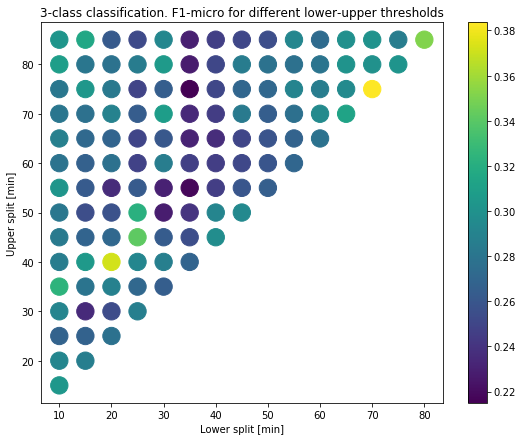

In [7]:
dx = pd.DataFrame(RES)
dx = dx[dx.Training == 'f1_score_micro']
dx = dx[dx.lower_bound >5]
dx = dx[dx.upper_bound <90]
plt.title('3-class classification. F1-micro for different lower-upper thresholds')
plt.scatter(dx.lower_bound, dx.upper_bound, s=300,c=dx.f1_macro)
plt.ylabel('Upper split [min]')
plt.xlabel('Lower split [min]')
plt.colorbar()
plt.savefig('multi-f1-micro.eps',format='eps')
plt.savefig('multi-f1-micro.png',format='png')

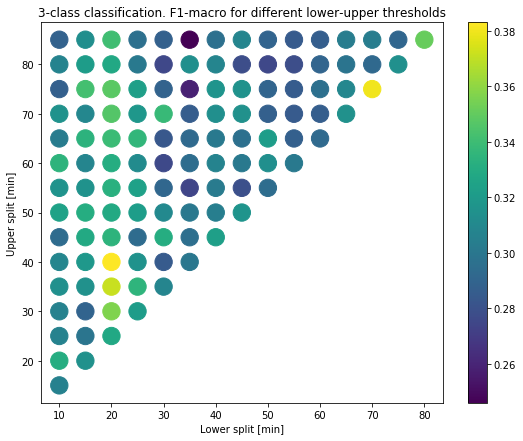

In [8]:
dx = pd.DataFrame(RES)
dx = dx[dx.Training == 'f1_score_macro']
dx = dx[dx.lower_bound >5]
dx = dx[dx.upper_bound <90]
plt.title('3-class classification. F1-macro for different lower-upper thresholds')
plt.scatter(dx.lower_bound, dx.upper_bound, s=300,c=dx.f1_macro)
plt.ylabel('Upper split [min]')
plt.xlabel('Lower split [min]')
plt.colorbar()
plt.savefig('multi-f1-macro.eps',format='eps')
plt.savefig('multi-f1-macro.png',format='png')

In [ ]:
clf = GradientBoostingClassifier ()

def CHECK(clf,X1,Y1):
    from sklearn.model_selection import cross_val_score as cv
    
    scoring = {'F1': 'f1',
           'P': 'precision',
           'R': 'recall','A':'accuracy'}
    scores = cross_validate(clf, X1, Y1, scoring=scoring,
                         cv=5, return_train_score=True)
    F1 = np.round(sum(scores['test_F1'])/5, 2)
    P = np.round(sum(scores['test_P'])/5, 2)
    R = np.round(sum(scores['test_R'])/5, 2)
    A = np.round(sum(scores['test_A'])/5, 2)
    
    return (F1,P,R,A)

In [ ]:
X,Y = getBFS(anom=0.00)

In [ ]:
SPSC = []

import copy

# 3-class split
for A in np.arange(5,120,5):
    for B in np.arange(A+5,120,5):
#         print(i,j)
        newY = copy.deepcopy(Y)
        newY[(Y>=0) & (Y<A)]=0
        newY[(Y>=A) & (Y<B)]=1
        newY[(Y>=B) & (Y<=max(Y))]=2
        
        skf = StratifiedKFold(n_splits=5)
        skf.get_n_splits(X, newY)
        ACC = 0.0
        for train_index, test_index in skf.split(X, newY):
# ...     print("TRAIN:", train_index, "TEST:", test_index)
            Xtr, Xte = X.iloc[train_index], X.iloc[test_index]
            Ytr, Yte = newY[train_index], newY[test_index]

            clf.fit(Xtr,Ytr)
            ACC += f1_score(clf.predict(Xte), Yte, average='macro')
        
        ACC=ACC/5
        
        print(A,B,ACC)
        
        SPSC.append({'A':A,'B':B,'ACC':ACC})

